In [1]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

In [2]:
def function(Lam):
    Time = 0        # начальное время
    Rmax = 2        # кол-во мест в очереди
    Tet = []        # список завпрашиваемых объемов ресурса заявками
    TetR = []       # аналог списка Tet для заявок в очереди
    R = []          # очередь
    WS = []         # список для записи момента поступления заявок в очередь (Waiting Start)
    Mu = []         # список прогнозируемых моментов окончания обслуживания соответсвующих заявок
    lamb = Lam      # параметр экспоненциального распределения времени меджу поступлениями заявок (интенсивность поступления)
    mu = 2          # параметр экспоненциального распределения "размера" заявки (время обслуживания)
    tau= 1          # параметр для получения продолжительности ожидания в очереди
    TET = 10        # количество ресурса
    tetmin = 1      # минимальное занимаемое количество ресурса на 1 заявку
    tetmax = 2      # максимальное
    Block = 0       # счетчик блокированых заяквок
    All = 0         # счетчик всех заявок
    Started = 0     # счетчик заявок, поступивши на приборы
    Passed = 0      # счетчик обработанных заявок(возможно не нужен)
    SR = 0          # средняя длина очереди
    SZS = 0         # (4) среднее число заявок в системе
    STP = 0         # (6) среднее время пребывания на приборах
    SWT = 0         # (5) среднее время ожидания
    S3 = 0          # (3) средний объём занятого ресурса
    ro = lamb/mu
    
    eps = 0.005     # точность вычислений
    tb = 1.96
    E = (eps/tb)**2
    stop = False
    V = random.expovariate(lamb)
    W = V**2
    
    while not stop:
        V_pred = V
        dt = random.expovariate(lamb)
        tet = np.random.randint(tetmin,tetmax)
        Time += dt
        All += 1
        if any(x <= Time for x in Mu):    # проверяем не вышли ли некоторые заявки за этот интервал времени
            i=0      
            while i < len(Mu):            # если да, то проверяем какие и удаляем их из Mu и Tet
                if Mu[i] <= Time:
                    w = Mu.pop(i)
                    TET += Tet.pop(i)     # не забывая освободить занимаемые ими ресурсы
                    Passed += 1
                    if len(R) != 0 and TetR[0] <= TET:         # если есть свободные ресурсы для первой заявки в очереди
                        R.pop(0)
                        SWT += w - WS.pop(0)
                        Mu.append(w + random.expovariate(mu))  #, то она поступает на прибор
                        STP += Mu[-1] - w
                        Tet.append(TetR.pop(0))
                        TET -= Tet[-1]
                        Started += 1
                    i -= 1
                i += 1
        
        S3 += sum(Tet)
        SR += len(R)
        if TET >= tet:              # проверяем есть ли место на приборах и на ресурсах для новой заявки
            Mu.append(Time+random.expovariate(mu))
            STP += Mu[-1] - Time
            Tet.append(tet)
            TET -= tet
            Started += 1
        else:                       # если нету, то прибавляем к счетчику блокировок
            if len(R) < Rmax:       # проверяем есть ли в очереди место
                R.append(1)
                WS.append(Time)
                TetR.append(tet)
            else:
                Block += 1
        
        V = V + dt
        W = W + dt**2
        if abs(V/(All+1)-V_pred/All)<eps and W/V<V*(E+1.0/(All+1)): # в изначальной формуле All на 1 меньше
            stop = True
    
    if len(Mu) != 0:
        for i in range(len(Mu)):
            STP -= (Mu[i] - Time)
    
    if len(R) != 0:
        for i in range(len(R)):
            SWT += Time - WS[i]
    
    STP += SWT

    return ro, Block/All, SWT/(All-Block), STP/(All-Block), SR/All, S3/All

In [3]:
R1 = []
R2 = []
R3 = []
R4 = []
R5 = []
R6 = []
for k in range(2,61,2):
    r1, r2, r3, r4, r5, r6 = function(k)
    R1.append(r1)  # ro
    R2.append(r2)  # block
    R3.append(r3)  # swt
    R4.append(r4)  # stp
    R5.append(r5)  # sr
    R6.append(r6)  # s3

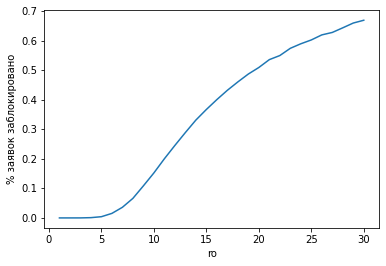

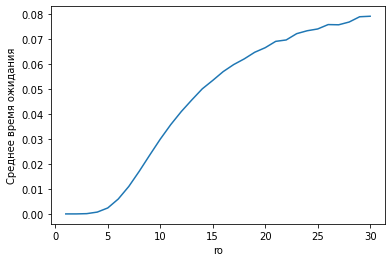

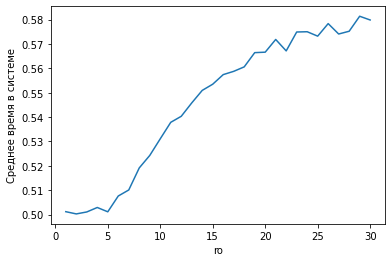

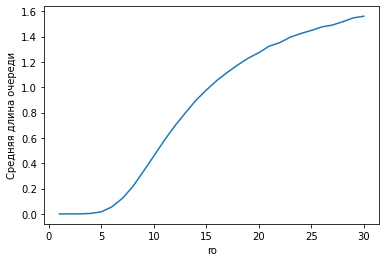

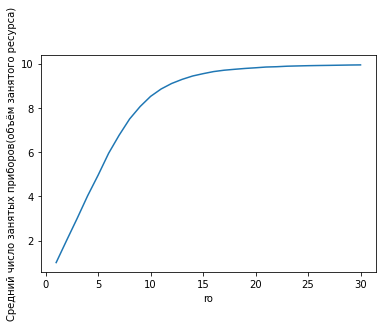

In [4]:
plt.plot(R1,R2)
plt.xlabel('ro')
plt.ylabel('% заявок заблокировано')
plt.show()

plt.plot(R1,R3)
plt.xlabel('ro')
plt.ylabel('Среднее время ожидания')
plt.show()

plt.plot(R1,R4)
plt.xlabel('ro')
plt.ylabel('Среднее время в системе')
plt.show()

plt.plot(R1,R5)
plt.xlabel('ro')
plt.ylabel('Средняя длина очереди')
plt.show()

plt.plot(R1,R6)
plt.xlabel('ro')
plt.ylabel('Средний число занятых приборов(объём занятого ресурса)')
plt.show()